In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
tesla_stock_data = pd.read_csv("/content/TSLA.csv" ,parse_dates=["Date"])

In [ ]:
tesla_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
1,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
3,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
4,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500


In [ ]:
tesla_stock_data['Date'] = pd.to_datetime(tesla_stock_data['Date'])

In [ ]:
tesla_stock_data.set_index('Date', inplace=True)

In [ ]:
tesla_stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500


In [ ]:
tesla_stock_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
tesla_stock_data.duplicated().sum()

0

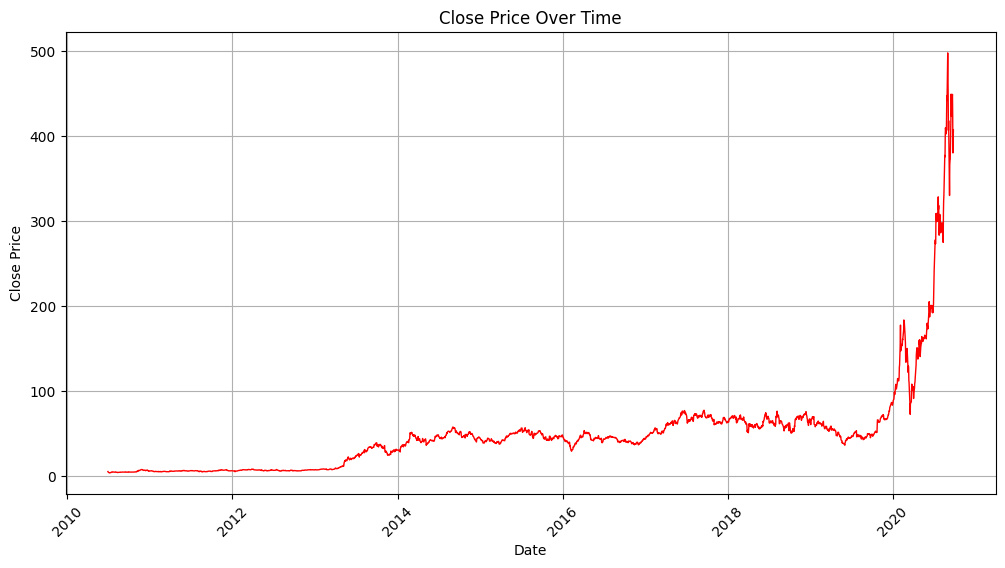

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=tesla_stock_data['Close'], linewidth=1, color='red')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid()
plt.show()

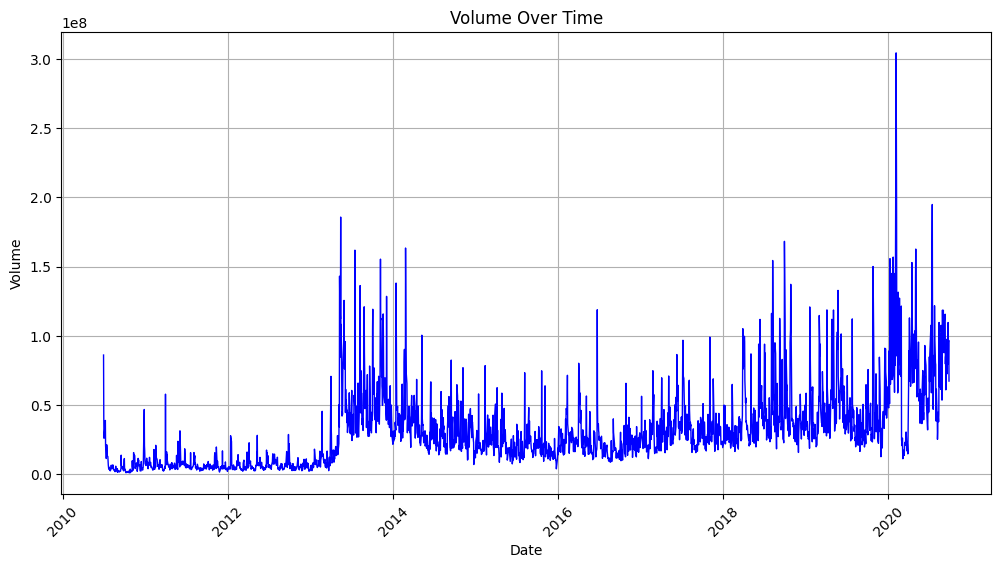

In [ ]:
# Visualize volume over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=tesla_stock_data['Volume'], linewidth=1, color='blue')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid()
plt.show()


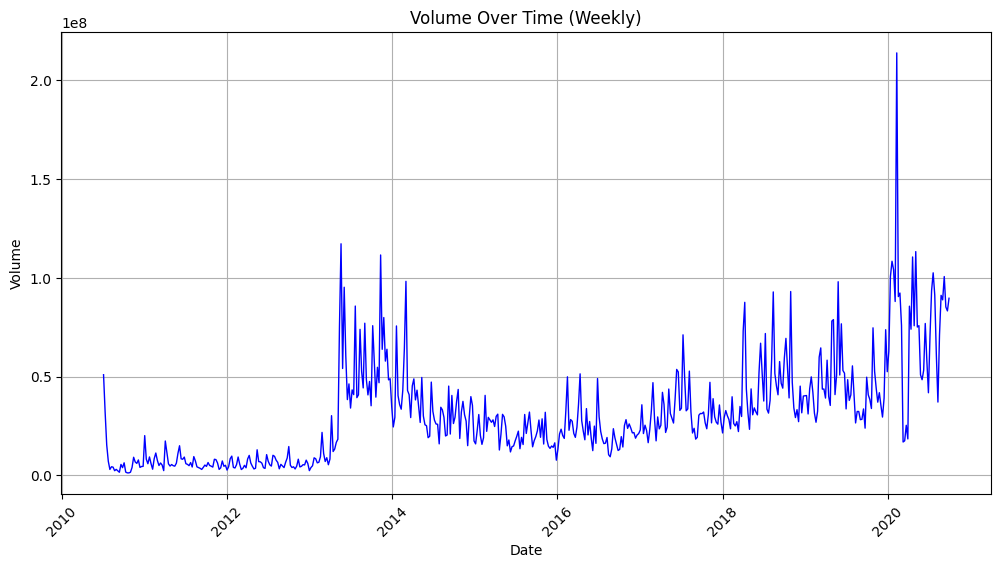

In [ ]:
# Resample the data to weekly frequency
tesla_stock_data_weekly = tesla_stock_data.resample('W').mean()

# Visualize volume over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=tesla_stock_data_weekly['Volume'], linewidth=1, color='blue')
plt.title('Volume Over Time (Weekly)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid()
plt.show()

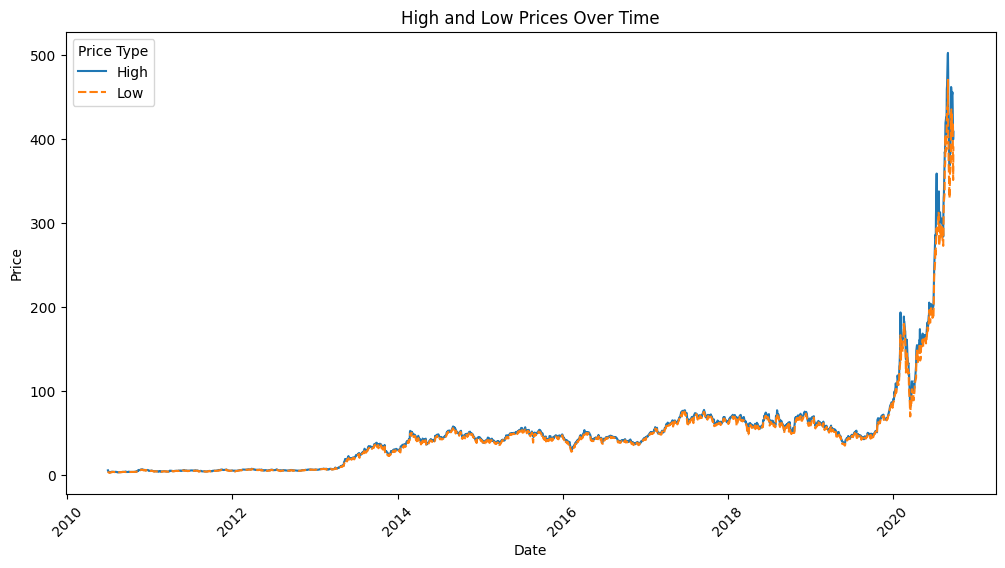

In [ ]:
# Visualize high and low prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=tesla_stock_data[['High','Low']], linewidth=1.5)
plt.title('High and Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Price Type')
plt.xticks(rotation=45)
plt.show()

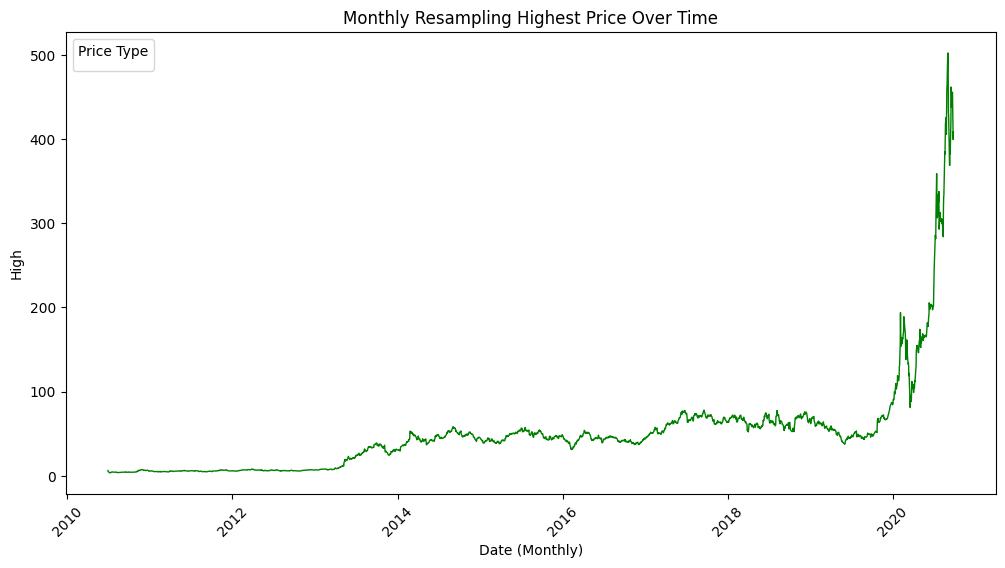

In [ ]:
tesla_stock_data_weekly = tesla_stock_data.resample('W').mean()
# Visualize high and low prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=tesla_stock_data['High'], linewidth=1, color='green')
plt.title('Monthly Resampling Highest Price Over Time')
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.legend(title='Price Type')
plt.xticks(rotation=45)
plt.show()


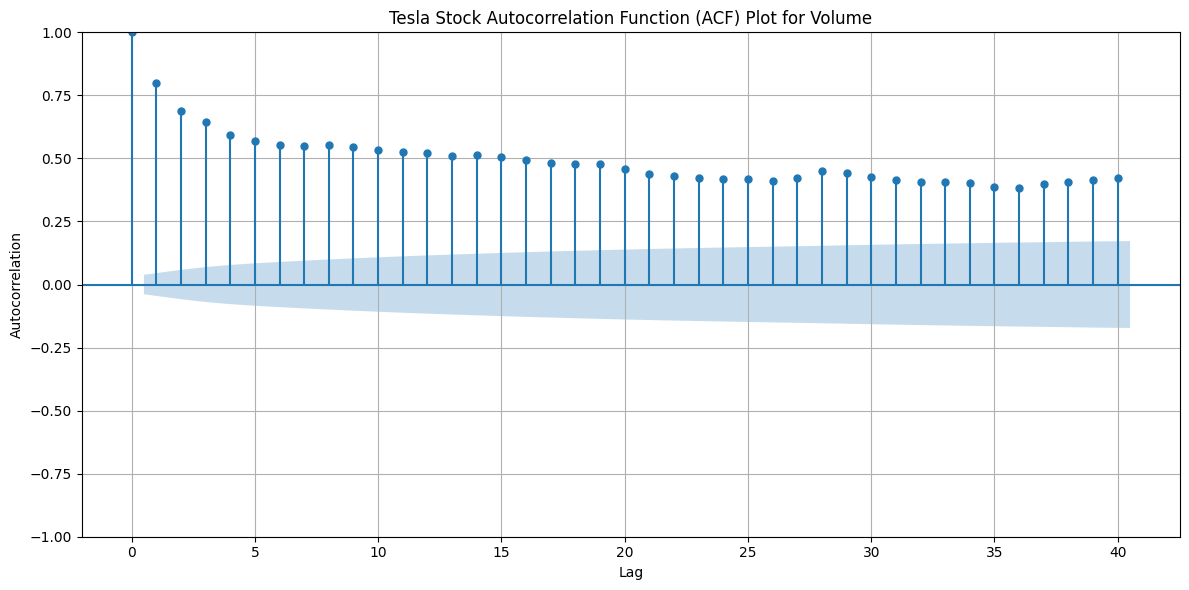

In [ ]:
# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(tesla_stock_data['Volume'],ax=plt.gca(), lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Tesla Stock Autocorrelation Function (ACF) Plot for Volume')
plt.tight_layout()
plt.grid()
plt.show()

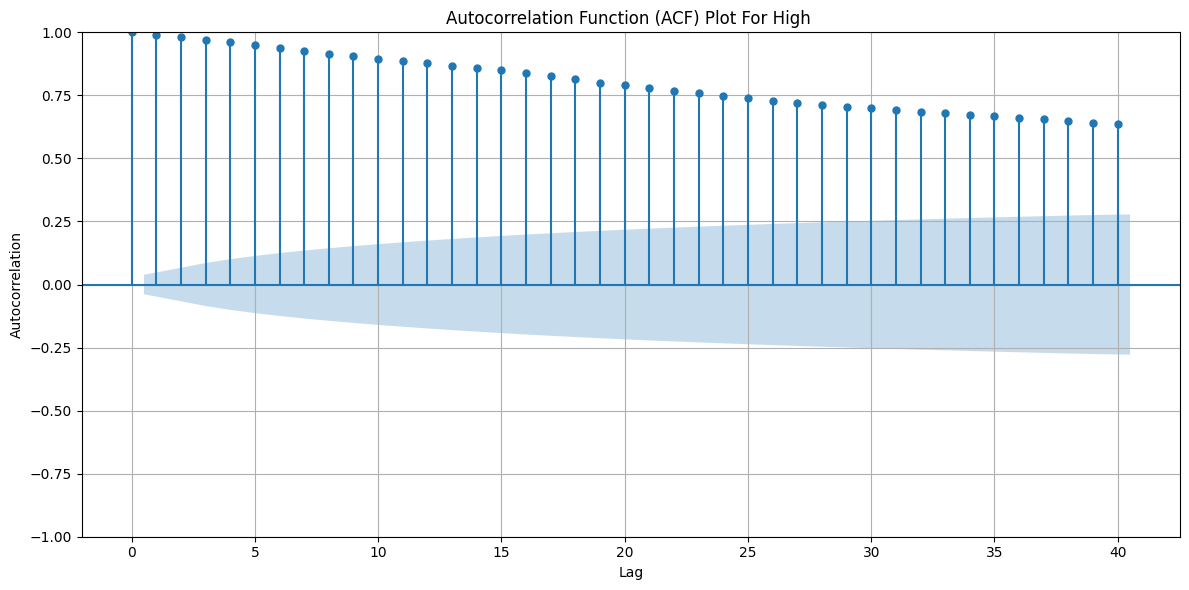

In [ ]:
# Plot ACF for identifying potential autocorrelation
plt.figure(figsize=(12, 6))
plot_acf(tesla_stock_data['High'], ax=plt.gca(), lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot For High ')
plt.tight_layout()
plt.grid()
plt.show()

***ADF TEST***

In [ ]:
# ADF test for stationarity for 'High' column

result = adfuller(tesla_stock_data['High'])
print('ADF Statistic:', result[0])
print('\np-value:', result[1])
print('\nCritical Values:', result[4])


ADF Statistic: 6.043302417656427

p-value: 1.0

Critical Values: {'1%': -3.432918025717116, '5%': -2.862674549708125, '10%': -2.567373963123101}


In [ ]:
# First-order differencing
tesla_stock_data['high_diff'] = tesla_stock_data['High'].diff()

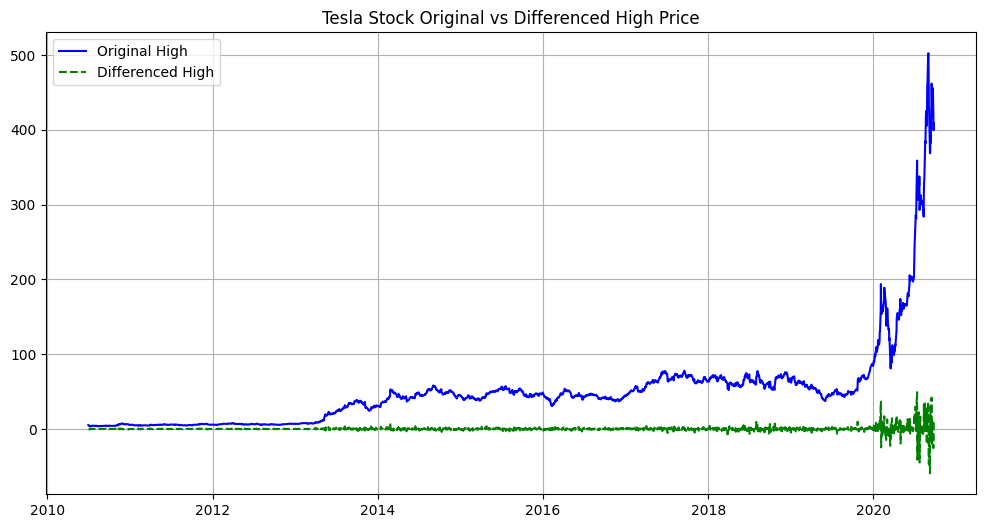

In [ ]:
# Plotting original vs differenced 'High' price
plt.figure(figsize=(12, 6))
plt.plot(tesla_stock_data['High'], label='Original High', color='blue')
plt.plot(tesla_stock_data['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Tesla Stock Original vs Differenced High Price')
plt.grid()
plt.show()

In [ ]:
# Moving average smoothing for 'High' column
window_size = 120
tesla_stock_data['high_smoothed'] = tesla_stock_data['High'].rolling(window=window_size).mean()

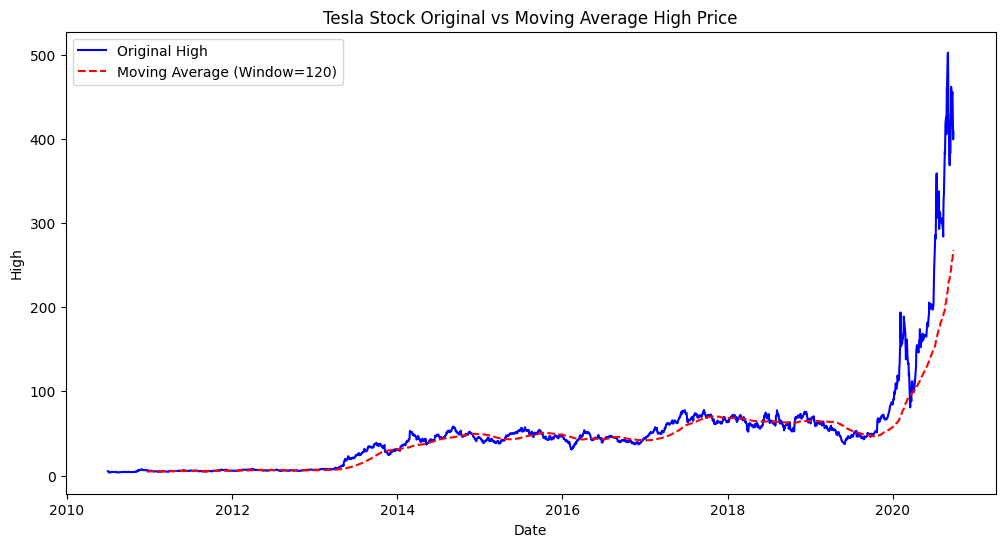

In [ ]:
# Plotting original vs moving average 'High' price
plt.figure(figsize=(12, 6))
plt.plot(tesla_stock_data['High'], label='Original High', color='blue')
plt.plot(tesla_stock_data['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Tesla Stock Original vs Moving Average High Price')
plt.legend()
plt.show()

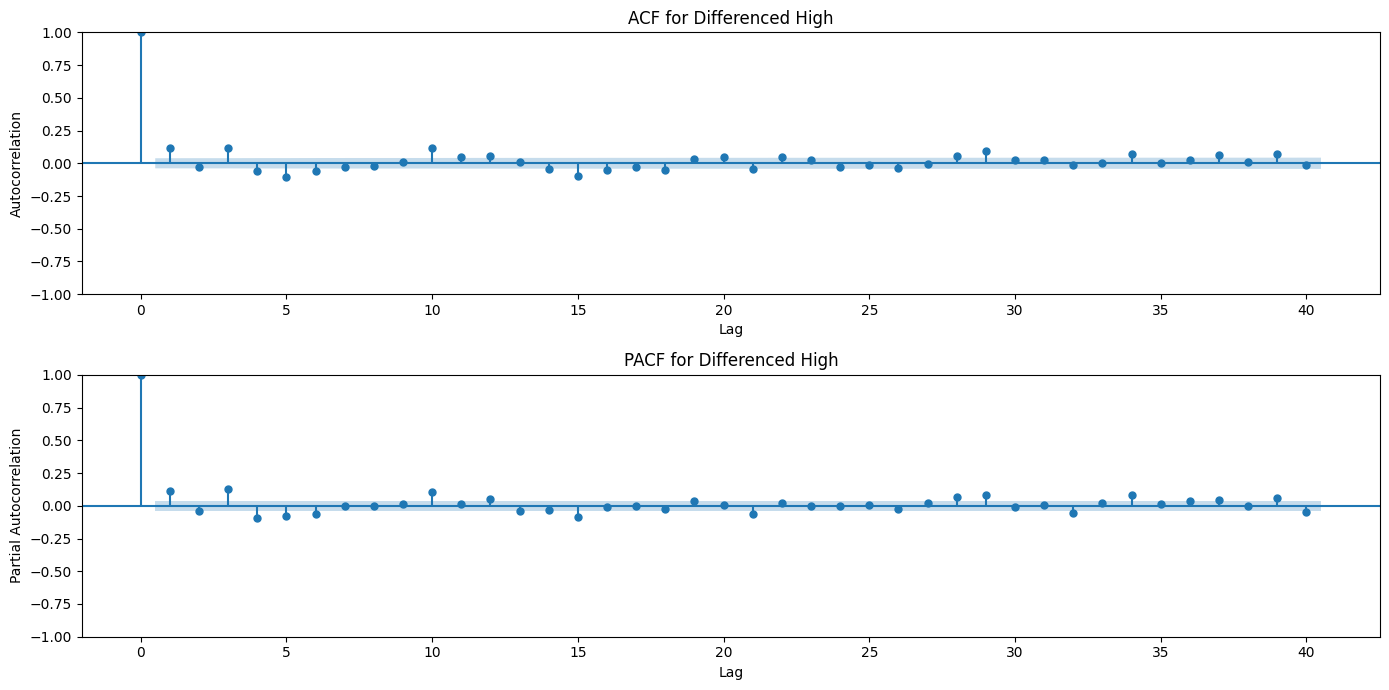

In [ ]:
# ACF and PACF plots for 'high_diff' column
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plot_acf(tesla_stock_data['high_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('ACF for Differenced High')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.subplot(2, 1, 2)
plot_pacf(tesla_stock_data['high_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('PACF for Differenced High')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()

In [ ]:
# Combine original 'High' column with differenced 'High' column
tesla_stock_data_combined = pd.concat([tesla_stock_data['High'], tesla_stock_data['high_diff']], axis=1)
tesla_stock_data_combined.head()

,High,high_diff
Date,,
2010-07-01,5.184,NaN
2010-07-02,4.620,-0.564
2010-07-06,4.000,-0.620
2010-07-07,3.326,-0.674
2010-07-08,3.504,0.178


In [ ]:
# Remove rows with missing values
tesla_stock_data.dropna(subset=['high_diff'], inplace=True)
tesla_stock_data['high_diff'].head()

Date
2010-07-02   -0.564
2010-07-06   -0.620
2010-07-07   -0.674
2010-07-08    0.178
2010-07-09    0.076
Name: high_diff, dtype: float64

In [ ]:
# ADF test for stationarity for differenced 'High' column
result = adfuller(tesla_stock_data['high_diff'])
print('ADF Statistic:', result[0])
print('\np-value:', result[1])
print('\nCritical Values:', result[4])

ADF Statistic: -6.868336215289117

p-value: 1.5384430599159823e-09

Critical Values: {'1%': -3.432919034594598, '5%': -2.862674995236558, '10%': -2.5673742003270332}


***Cummulative Moving Average(CMA)***

In [ ]:
# Cumulative Moving Average (CMA) for 'High' column
window_size = 120
tesla_stock_data['high_cma'] = tesla_stock_data['High'].expanding(min_periods=window_size).mean()

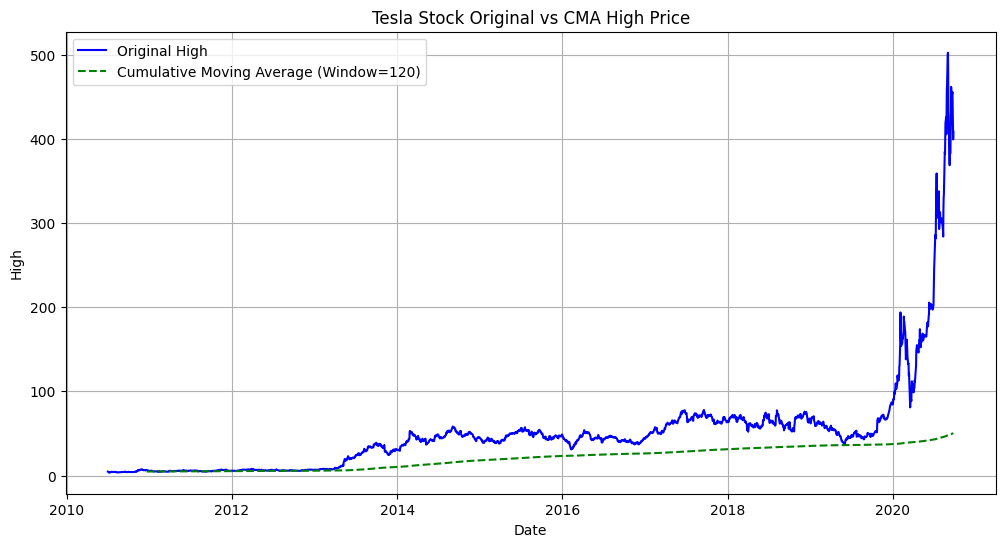

In [ ]:
# Plotting original vs CMA 'High' price
plt.figure(figsize=(12, 6))
plt.plot(tesla_stock_data['High'], label='Original High', color='blue')
plt.plot(tesla_stock_data['high_cma'], label=f'Cumulative Moving Average (Window={window_size})', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Tesla Stock Original vs CMA High Price')
plt.legend()
plt.grid()
plt.show()

***Exponential Moving Average(EMA)***

In [ ]:
# Exponential Moving Average (EMA) for 'High' column
span = 120
tesla_stock_data['high_ema'] = tesla_stock_data['High'].ewm(span=span, adjust=False).mean()

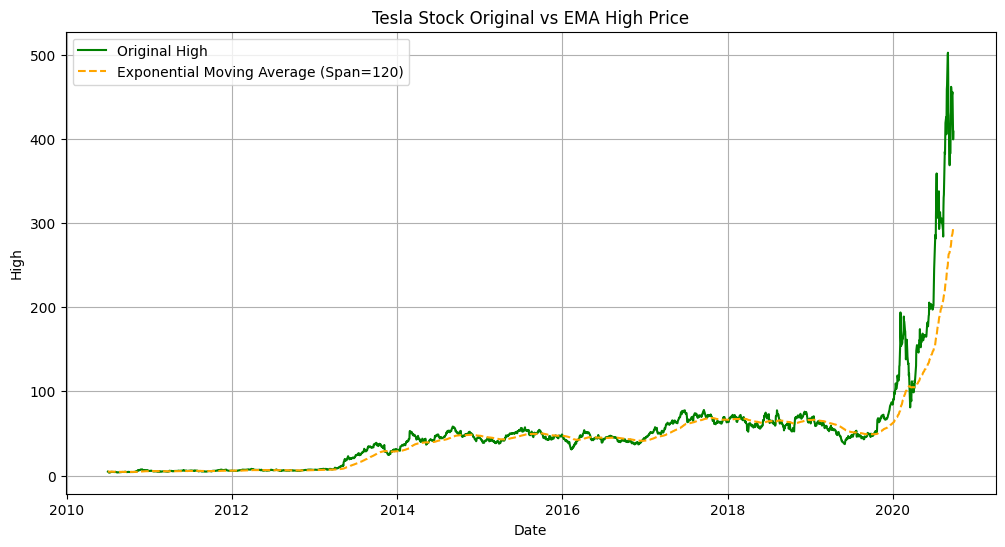

In [ ]:
# Plotting original vs EMA 'High' price
plt.figure(figsize=(12, 6))
plt.plot(tesla_stock_data['High'], label='Original High', color='green')
plt.plot(tesla_stock_data['high_ema'], label=f'Exponential Moving Average (Span={span})', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Tesla Stock Original vs EMA High Price')
plt.legend()
plt.grid()
plt.show()

***Origial vs CMA vs EMA***

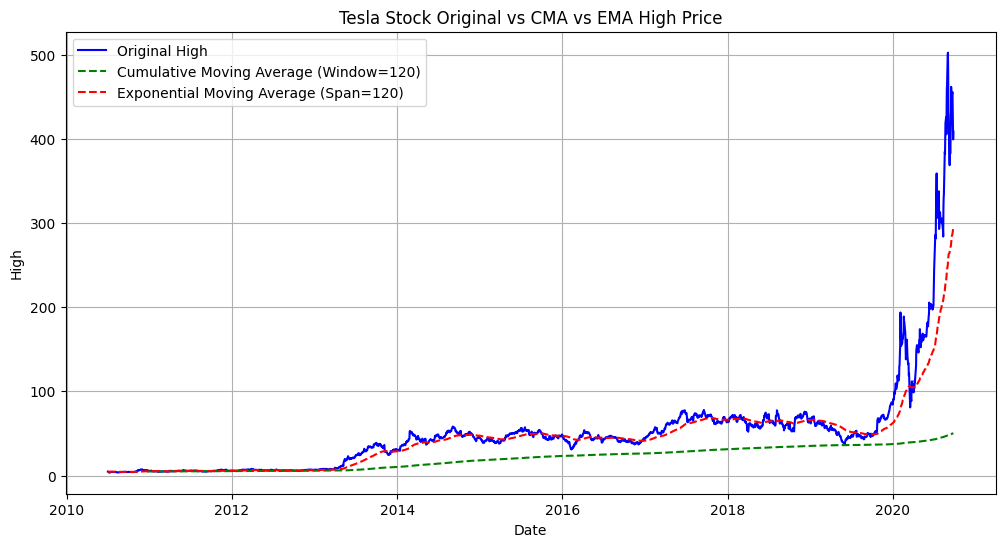

In [ ]:
# Plotting original vs CMA vs EMA 'High' price
plt.figure(figsize=(12, 6))
plt.plot(tesla_stock_data['High'], label='Original High', color='blue')
plt.plot(tesla_stock_data['high_cma'], label=f'Cumulative Moving Average (Window={window_size})', linestyle='--', color='green')
plt.plot(tesla_stock_data['high_ema'], label=f'Exponential Moving Average (Span={span})', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Tesla Stock Original vs CMA vs EMA High Price')
plt.legend()
plt.grid()
plt.show()

***Seasonal Decomposition***

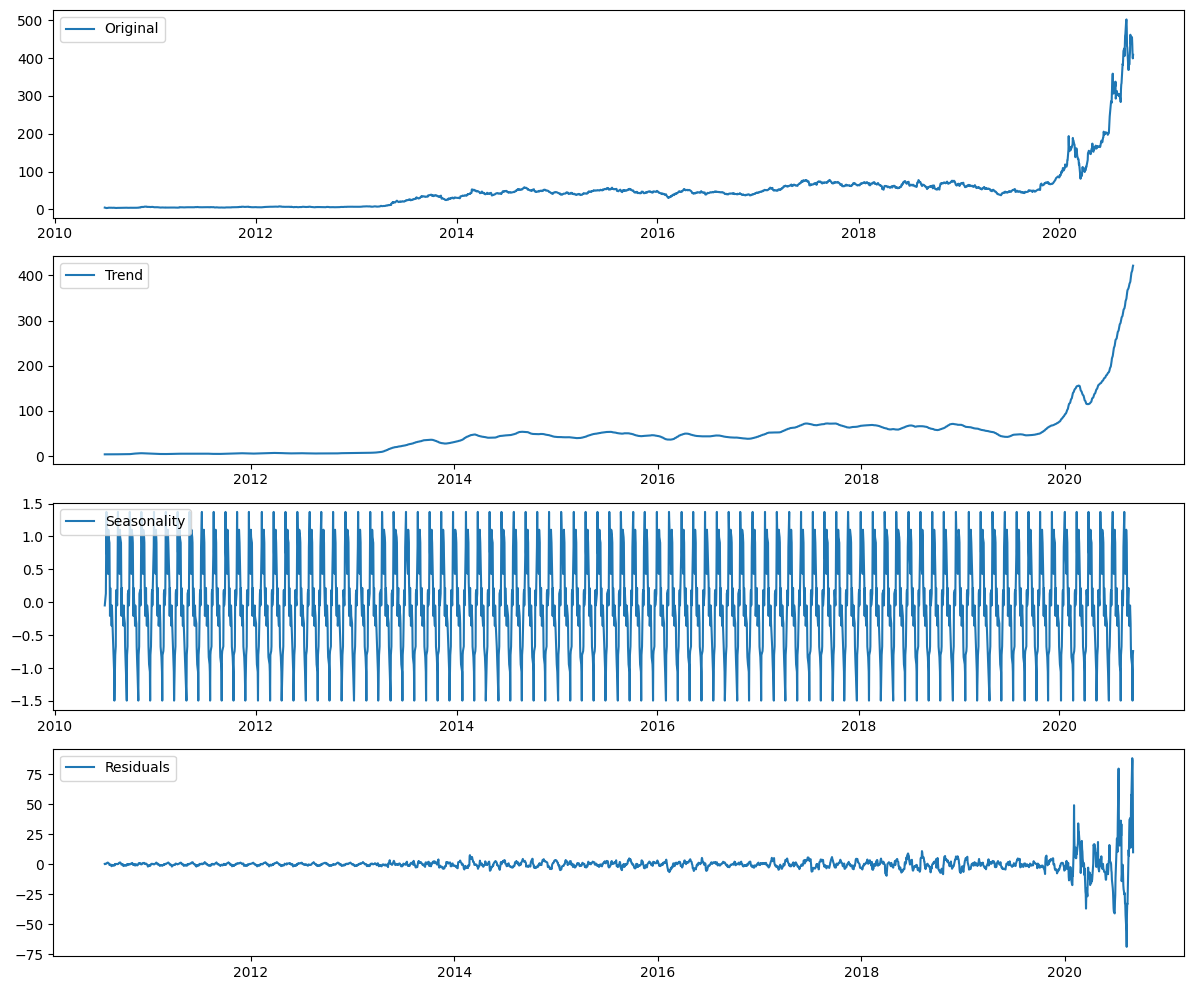

In [ ]:
# Seasonal decomposition of 'High' column
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(tesla_stock_data['High'], model='additive', period=30)  # Assuming a seasonal period of 30 days
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(tesla_stock_data['High'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()